                            OLS Regression Results                            
Dep. Variable:           Taxes_Levied   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     305.9
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           6.57e-21
Time:                        22:00:16   Log-Likelihood:                 23.862
No. Observations:                  30   AIC:                            -35.72
Df Residuals:                      24   BIC:                            -27.32
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

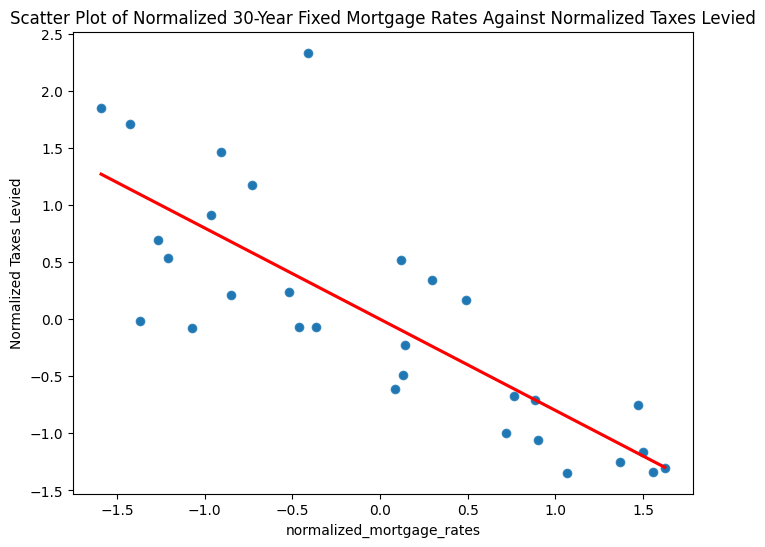

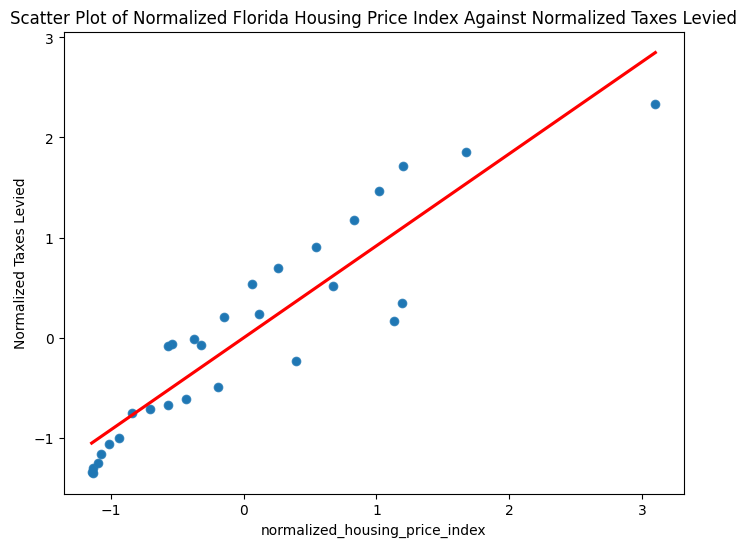

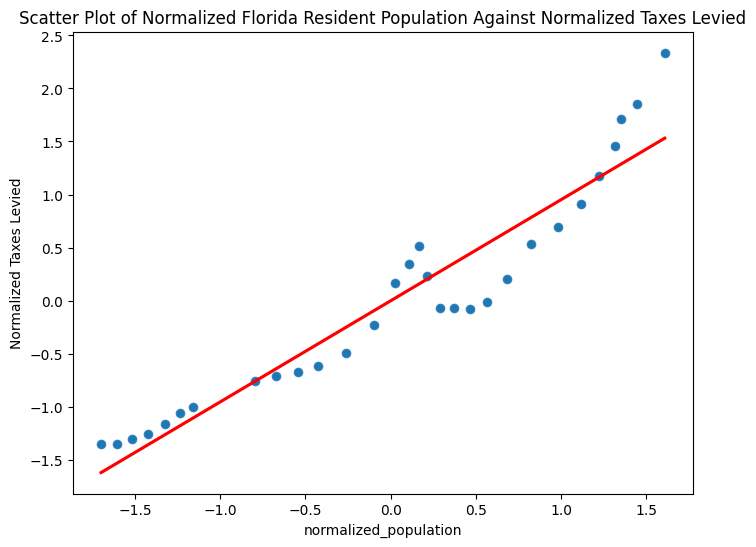

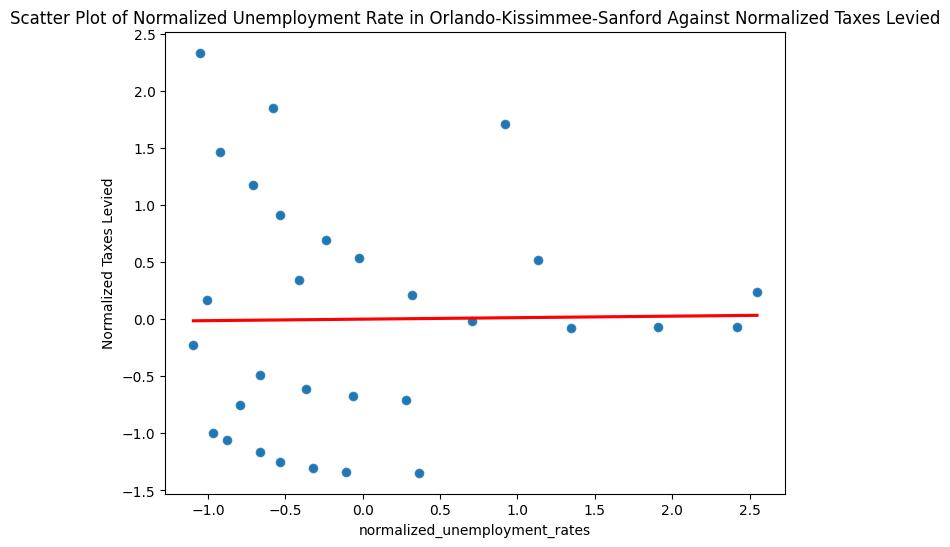

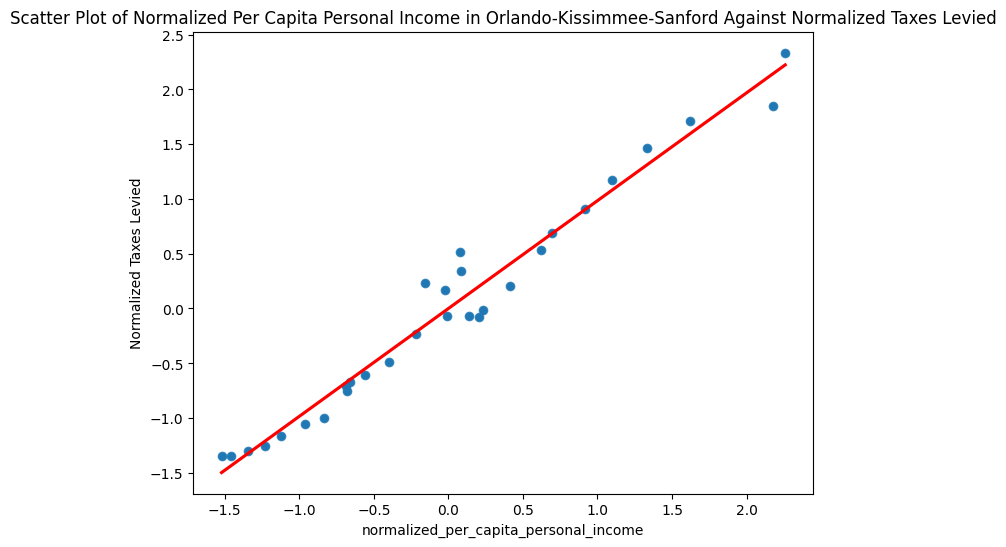

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

maindata = pd.read_excel("/workspaces/research/Regression/Metrics Research Project Extracted Data (1).xlsx")
maindata.columns = ['Taxes_Levied', 'Florida_Resident_Population', 'Florida_Housing_Price_Index', 'Mortgage_Rates', 'Unemployment_Rates', 'Per_Capita_Personal_Income']
maindata = maindata.apply(pd.to_numeric)
maindata['Taxes_Levied'] = maindata['Taxes_Levied'].astype(float)

# Calculate the mean and standard deviation of dependent variable
mean_taxes_levied = np.mean(maindata['Taxes_Levied'])
std_taxes_levied = np.std(maindata['Taxes_Levied'])

# Calculate the mean and standard deviation of each independent variable
mean_mortgage_rate = np.mean(maindata['Mortgage_Rates'])
std_mortgage_rate = np.std(maindata['Mortgage_Rates'])

mean_housing_price_index = np.mean(maindata['Florida_Housing_Price_Index'])
std_housing_price_index = np.std(maindata['Florida_Housing_Price_Index'])

mean_population = np.mean(maindata['Florida_Resident_Population'])
std_population = np.std(maindata['Florida_Resident_Population'])

mean_unemployment_rates = np.mean(maindata['Unemployment_Rates'])
std_unemployment_rates = np.std(maindata['Unemployment_Rates'])

mean_per_capita_personal_income = np.mean(maindata['Per_Capita_Personal_Income'])
std_per_capita_personal_income = np.std(maindata['Per_Capita_Personal_Income'])

# Normalize the data
normalized_Taxes_Levied = (maindata['Taxes_Levied'] - mean_taxes_levied) / std_taxes_levied
normalized_mortgage_rates = (maindata['Mortgage_Rates'] - mean_mortgage_rate) / std_mortgage_rate
normalized_housing_price_index = (maindata['Florida_Housing_Price_Index'] - mean_housing_price_index) / std_housing_price_index
normalized_population = (maindata['Florida_Resident_Population'] - mean_population) / std_population
normalized_unemployment_rates = (maindata['Unemployment_Rates'] - mean_unemployment_rates) / std_unemployment_rates
normalized_per_capita_personal_income = (maindata['Per_Capita_Personal_Income'] - mean_per_capita_personal_income) / std_per_capita_personal_income

# Create a NumPy array of the normalized independent variables and add intercept
X = np.column_stack((np.ones(len(maindata)), normalized_mortgage_rates, normalized_housing_price_index, normalized_population, normalized_unemployment_rates, normalized_per_capita_personal_income))
X_df = pd.DataFrame(X, columns=['Intercept', 'normalized_mortgage_rates', 'normalized_housing_price_index', 'normalized_population', 'normalized_unemployment_rates', 'normalized_per_capita_personal_income'])

# Use the entire dataset as both X and endog
X_train = X_df
y_train = normalized_Taxes_Levied

# Create a multilinear regression model with heteroscedasticity
model = sm.OLS(endog=y_train, exog=X_train).fit(cov_type='HC3')  # Use 'HC3' for heteroskedasticity-robust standard errors

# Fit the model to the entire dataset
results = model.summary()
print(results)

# Plot scatter plots for each variable against the dependent variable with regression lines
variables = ['normalized_mortgage_rates', 'normalized_housing_price_index', 'normalized_population', 'normalized_unemployment_rates', 'normalized_per_capita_personal_income']
titles = [
    'Scatter Plot of Normalized 30-Year Fixed Mortgage Rates Against Normalized Taxes Levied',
    'Scatter Plot of Normalized Florida Housing Price Index Against Normalized Taxes Levied',
    'Scatter Plot of Normalized Florida Resident Population Against Normalized Taxes Levied',
    'Scatter Plot of Normalized Unemployment Rate in Orlando-Kissimmee-Sanford Against Normalized Taxes Levied',
    'Scatter Plot of Normalized Per Capita Personal Income in Orlando-Kissimmee-Sanford Against Normalized Taxes Levied'
]

for variable, title in zip(variables, titles):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot
    sns.scatterplot(x=X_train[variable], y=y_train)
    
    # Regression line
    sns.regplot(x=X_train[variable], y=y_train, ci=None, line_kws={'color': 'red'})
    
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel('Normalized Taxes Levied')
    plt.show()
